In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
housing = fetch_openml(name='boston')
print(housing)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [3]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['MEDV'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [4]:
df = pd.concat([data, target], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

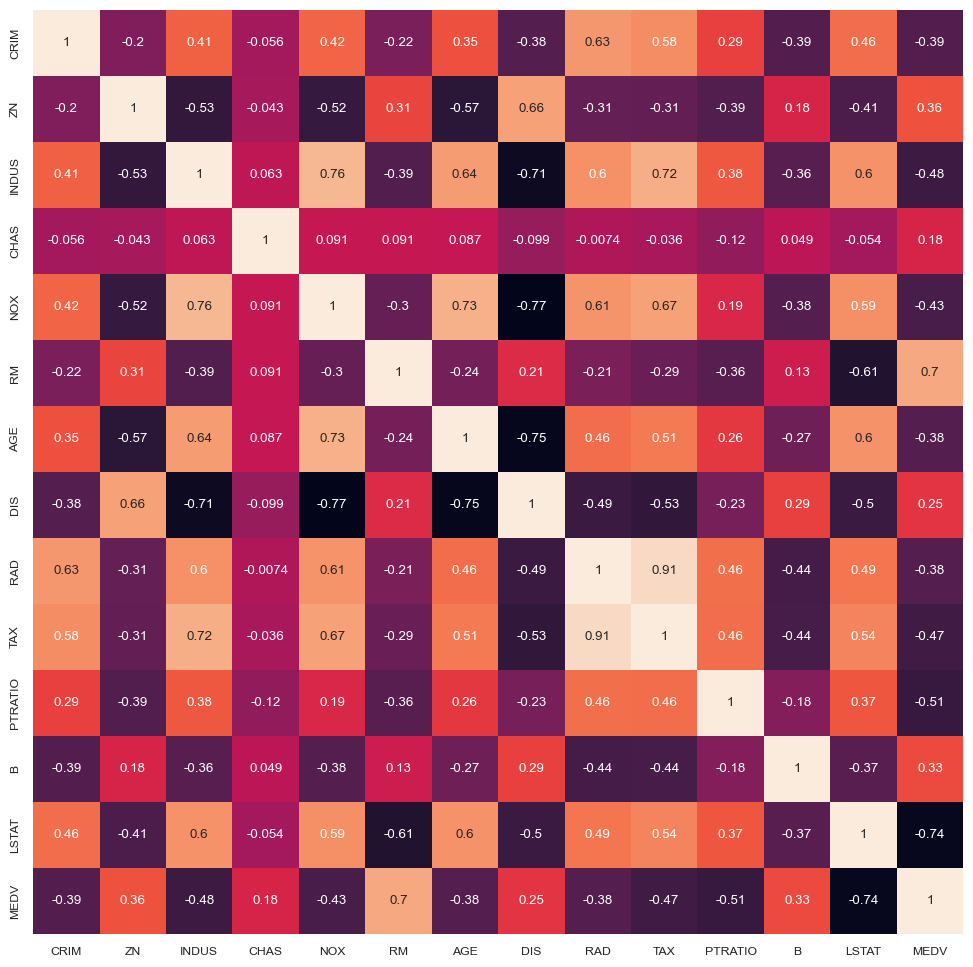

In [7]:
df_corr = df.corr()

#히트맵 그리기
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()

In [8]:
corr_order = df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [9]:
plot_cols = ['MEDV','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:, plot_cols]
plot_df

,MEDV,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18
...,...,...,...,...,...
501,22.4,9.67,6.593,21.0,11.93
502,20.6,9.08,6.120,21.0,11.93
503,23.9,5.64,6.976,21.0,11.93
504,22.0,6.48,6.794,21.0,11.93


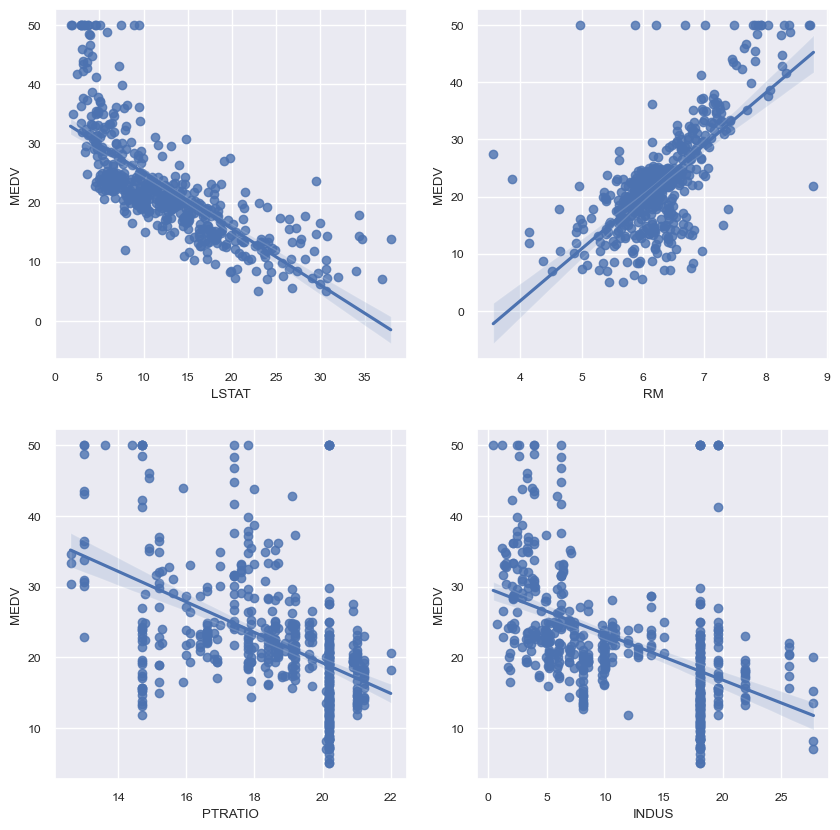

In [10]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

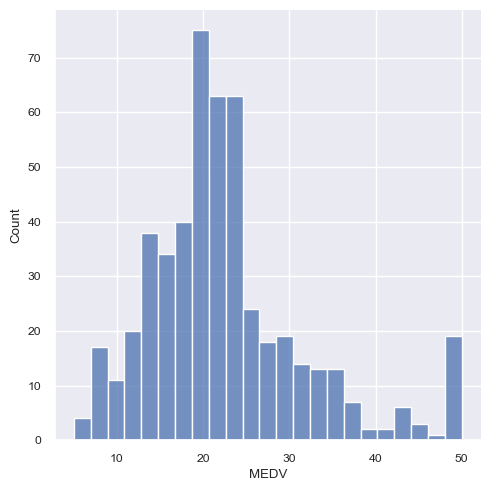

In [11]:
sns.displot(x='MEDV', kind='hist', data=df)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [13]:
from sklearn.model_selection import train_test_split

x_data = df.loc[:,['LSTAT','RM']]
y_data = df.loc[:,'MEDV']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_,1))

회귀계수(기울기): [-24.  26.]
상수항(절편): 16.4


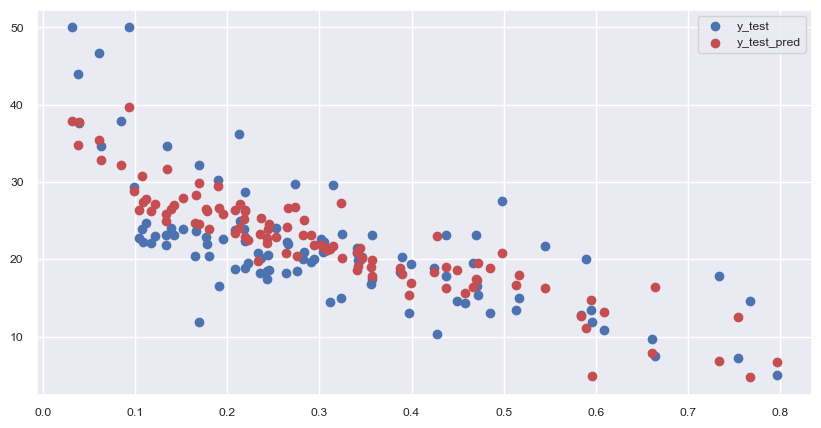

In [16]:
y_test_pred = lr.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test['LSTAT'], y_test, label='y_test')
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_test_pred')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:31.500221
Test MSE: 26.782877


In [19]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [46.1766 35.2914 25.4015 31.4861 28.7928]
평균 MSE:33.429682


In [20]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본학습 데티터 셋:", x_train.shape)
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본학습 데티터 셋: (404, 2)
2차 다항식 변환 데이터 셋: (404, 6)


In [21]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:20.827788
Test MSE:19.561734


In [25]:
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly,  y_train)

y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:10.904321
Test MSE:428125323705.818787
